### Chapter 5

#### How to Clean Text Manually and with NLTK

In [1]:
import numpy as np
import re
import string

from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import hashing_trick
from keras.preprocessing.text import Tokenizer

from os import listdir

from collections import Counter

from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense

from pandas import DataFrame
from matplotlib import pyplot

from gensim.models import Word2Vec
from sklearn.decomposition import PCA

from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from keras_preprocessing.sequence import pad_sequences
from keras.layers import Flatten
from keras.layers import Embedding

from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.models import load_model

In [2]:
# load text
filename = '../Data/metamorphosis_clean.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [2]:
text

'One morning, when Gregor Samsa woke from troubled dreams, he found\nhimself transformed in his bed into a horrible vermin.  He lay on\nhis armour-like back, and if he lifted his head a little he could\nsee his brown belly, slightly domed and divided by arches into stiff\nsections.  The bedding was hardly able to cover it and seemed ready\nto slide off any moment.  His many legs, pitifully thin compared\nwith the size of the rest of him, waved about helplessly as he\nlooked.\n\n"What\'s happened to me?" he thought.  It wasn\'t a dream.  His room,\na proper human room although a little too small, lay peacefully\nbetween its four familiar walls.  A collection of textile samples\nlay spread out on the table - Samsa was a travelling salesman - and\nabove it there hung a picture that he had recently cut out of an\nillustrated magazine and housed in a nice, gilded frame.  It showed\na lady fitted out with a fur hat and fur boa who sat upright,\nraising a heavy fur muff that covered the whole

In [3]:
# split into words by white space
words = text.split()
print(words[:100])

['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [6]:
# split based on words only
words = re.split(r'\W+', text)
print(words[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armour', 'like', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 's', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasn', 't', 'a', 'dream', 'His', 'room']


Again, running the example we can see that we get our list of words. This time, we can see
that armour-like is now two words armour and like (fine) but contractions like What's is also
two words What and s (not great)

In [7]:
# Split by Whitespace and Remove Punctuation

In [10]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [14]:
words = text.split()

re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in words]
print(stripped[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'armourlike', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'Whats', 'happened', 'to', 'me', 'he', 'thought', 'It', 'wasnt', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human']


In [12]:
re_punc

re.compile(r'[!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~]',
re.UNICODE)

In [13]:
re.escape(string.punctuation)

'!"\\#\\$%\\&\'\\(\\)\\*\\+,\\-\\./:;<=>\\?@\\[\\\\\\]\\^_`\\{\\|\\}\\~'

We can see that this has had the desired eect, mostly. Contractions like What's have
become Whats but armour-like has become armourlike.

In [15]:
re_print = re.compile('[^%s]' % re.escape(string.printable))
result = [re_print.sub('', w) for w in words]
print(result[:100])

['One', 'morning,', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'He', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'His', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"What\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'It', "wasn't", 'a', 'dream.', 'His', 'room,', 'a', 'proper', 'human']


In [16]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [17]:
re.compile('[^%s]' % re.escape(string.printable))

re.compile(r'[^0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"\#\$%\&\'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~\ \\t\\n\\r\\x0b\\x0c]',
re.UNICODE)

### Normalizing Case

In [18]:
# split into words by white space
words = text.split()
# convert to lower case
words = [word.lower() for word in words]
print(words[:100])

['one', 'morning,', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubled', 'dreams,', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin.', 'he', 'lay', 'on', 'his', 'armour-like', 'back,', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly,', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections.', 'the', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment.', 'his', 'many', 'legs,', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him,', 'waved', 'about', 'helplessly', 'as', 'he', 'looked.', '"what\'s', 'happened', 'to', 'me?"', 'he', 'thought.', 'it', "wasn't", 'a', 'dream.', 'his', 'room,', 'a', 'proper', 'human']


### Tokenization and Cleaning with NLTK

In [3]:
# Split into Sentences
# split into sentences
sentences = sent_tokenize(text)
print(sentences[0])

One morning, when Gregor Samsa woke from troubled dreams, he found
himself transformed in his bed into a horrible vermin.


In [5]:
# split into words
tokens = word_tokenize(text)
print(tokens[:100])

['One', 'morning', ',', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', ',', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', '.', 'He', 'lay', 'on', 'his', 'armour-like', 'back', ',', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', ',', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', '.', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', '.', 'His', 'many', 'legs', ',', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', '.', '``', 'What', "'s", 'happened', 'to']


Running the code, we can see that punctuation are now tokens that we could then decide to
specifically filter out.

In [6]:
# split into words
tokens = word_tokenize(text)
# remove all tokens that are not alphabetic
words = [word for word in tokens if word.isalpha()]
print(words[:100])

['One', 'morning', 'when', 'Gregor', 'Samsa', 'woke', 'from', 'troubled', 'dreams', 'he', 'found', 'himself', 'transformed', 'in', 'his', 'bed', 'into', 'a', 'horrible', 'vermin', 'He', 'lay', 'on', 'his', 'back', 'and', 'if', 'he', 'lifted', 'his', 'head', 'a', 'little', 'he', 'could', 'see', 'his', 'brown', 'belly', 'slightly', 'domed', 'and', 'divided', 'by', 'arches', 'into', 'stiff', 'sections', 'The', 'bedding', 'was', 'hardly', 'able', 'to', 'cover', 'it', 'and', 'seemed', 'ready', 'to', 'slide', 'off', 'any', 'moment', 'His', 'many', 'legs', 'pitifully', 'thin', 'compared', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', 'waved', 'about', 'helplessly', 'as', 'he', 'looked', 'What', 'happened', 'to', 'me', 'he', 'thought', 'It', 'was', 'a', 'dream', 'His', 'room', 'a', 'proper', 'human', 'room']


Running the example, you can see that not only punctuation tokens, but examples like
armour-like and 's were also filtered out.

#### Filter out Stop Words (and Pipeline)

In [8]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
# split into words
tokens = word_tokenize(text)
# convert to lower case
tokens = [w.lower() for w in tokens]
# prepare regex for char filtering
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
stripped = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
words = [word for word in stripped if word.isalpha()]
# filter out stop words
stop_words = set(stopwords.words('english'))
words = [w for w in words if not w in stop_words]
print(words[:100])

['one', 'morning', 'gregor', 'samsa', 'woke', 'troubled', 'dreams', 'found', 'transformed', 'bed', 'horrible', 'vermin', 'lay', 'armourlike', 'back', 'lifted', 'head', 'little', 'could', 'see', 'brown', 'belly', 'slightly', 'domed', 'divided', 'arches', 'stiff', 'sections', 'bedding', 'hardly', 'able', 'cover', 'seemed', 'ready', 'slide', 'moment', 'many', 'legs', 'pitifully', 'thin', 'compared', 'size', 'rest', 'waved', 'helplessly', 'looked', 'happened', 'thought', 'nt', 'dream', 'room', 'proper', 'human', 'room', 'although', 'little', 'small', 'lay', 'peacefully', 'four', 'familiar', 'walls', 'collection', 'textile', 'samples', 'lay', 'spread', 'table', 'samsa', 'travelling', 'salesman', 'hung', 'picture', 'recently', 'cut', 'illustrated', 'magazine', 'housed', 'nice', 'gilded', 'frame', 'showed', 'lady', 'fitted', 'fur', 'hat', 'fur', 'boa', 'sat', 'upright', 'raising', 'heavy', 'fur', 'muff', 'covered', 'whole', 'lower', 'arm', 'towards', 'viewer']


Running this example, we can see that in addition to all of the other transforms, stop words
like a and to have been removed. I note that we are still left with tokens like nt. The rabbit
hole is deep; there's always more we can do.

### Stem Words

In [11]:
# split into words
tokens = word_tokenize(text)
# stemming of words
porter = PorterStemmer()
stemmed = [porter.stem(word) for word in tokens]
print(stemmed[:100])

['one', 'morn', ',', 'when', 'gregor', 'samsa', 'woke', 'from', 'troubl', 'dream', ',', 'he', 'found', 'himself', 'transform', 'in', 'hi', 'bed', 'into', 'a', 'horribl', 'vermin', '.', 'he', 'lay', 'on', 'hi', 'armour-lik', 'back', ',', 'and', 'if', 'he', 'lift', 'hi', 'head', 'a', 'littl', 'he', 'could', 'see', 'hi', 'brown', 'belli', ',', 'slightli', 'dome', 'and', 'divid', 'by', 'arch', 'into', 'stiff', 'section', '.', 'the', 'bed', 'wa', 'hardli', 'abl', 'to', 'cover', 'it', 'and', 'seem', 'readi', 'to', 'slide', 'off', 'ani', 'moment', '.', 'hi', 'mani', 'leg', ',', 'piti', 'thin', 'compar', 'with', 'the', 'size', 'of', 'the', 'rest', 'of', 'him', ',', 'wave', 'about', 'helplessli', 'as', 'he', 'look', '.', '``', 'what', "'s", 'happen', 'to']


Running the example, you can see that words have been reduced to their stems, such as
trouble has become troubl. You can also see that the stemming implementation has also reduced
the tokens to lowercase, likely for internal look-ups in word tables.

## Chapter 6

### How to Prepare Text Data with scikit-learn

In [12]:
# The Bag-of-Words Model

In [14]:
# Word Counts with CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
(1, 8)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 1 1 1 1 1 1 2]]


In [15]:
vector

<1x8 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [16]:
# encode another document
text2 = ["the puppy"]
vector = vectorizer.transform(text2)
print(vector.toarray())

[[0 0 0 0 0 0 0 1]]


In [18]:
# Word Frequencies with TfidfVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog.",
"The dog.",
"The fox"]
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)
# encode document
vector = vectorizer.transform([text[0]])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]
(1, 8)
[[0.36388646 0.27674503 0.27674503 0.36388646 0.36388646 0.36388646
  0.36388646 0.42983441]]


In [53]:
print(vectorizer.transform([text[1]]).toarray())

[[0.         0.78980693 0.         0.         0.         0.
  0.         0.61335554]]


In [54]:
print(vectorizer.transform([text[2]]).toarray())

[[0.         0.         0.78980693 0.         0.         0.
  0.         0.61335554]]


* Below formulas are used in sklearn package
* TF = (number of times the term/word appears in the document)
* IDF = log((number of documents in the corpus + 1)/(number of documents containing the term/word + 1)) + 1
* TF-IDF = TF * IDF

* idf of 'brown' = log((3 + 1) / (1 + 1)) + 1
* idf of 'dog' = log((3 + 1) / (2 + 1)) + 1
* idf of 'the' = log((3 + 1) / (3 + 1)) + 1

In [68]:
# Final tf-idf is calculated after applying normalization as per below formula
# Link: https://www.analyticsvidhya.com/blog/2021/11/how-sklearns-tfidfvectorizer-calculates-tf-idf-values/
import math

1.28768207 / math.sqrt((1.28768207 * 1.28768207) + 1)

0.7898069285003484

### Hashing with HashingVectorizer

In [70]:
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = HashingVectorizer(n_features=20)
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(1, 20)
[[ 0.          0.          0.          0.          0.          0.33333333
   0.         -0.33333333  0.33333333  0.          0.          0.33333333
   0.          0.          0.         -0.33333333  0.          0.
  -0.66666667  0.        ]]


Running the example encodes the sample document as a 20-element sparse array. The values
of the encoded document correspond to normalized word counts by default in the range of -1 to
1, but could be made simple integer counts by changing the default configuration.

## Chapter 7

### How to Prepare Text Data With Keras

#### # Split Words with text to word sequence

In [4]:
# define the document
text = 'The quick brown fox jumped over the lazy dog.'
# tokenize the document
result = text_to_word_sequence(text)
print(result)

['the', 'quick', 'brown', 'fox', 'jumped', 'over', 'the', 'lazy', 'dog']


#### By default text_to_word_sequence does the below
* Splits words by space.
* Filters out punctuation.
* Converts text to lowercase (lower=True).

#### Encoding with one hot

In [6]:
# estimate the size of the vocabulary
words = set(text_to_word_sequence(text))
vocab_size = len(words)
print(vocab_size)

8


In [29]:
# integer encode the document
result = one_hot(text, round(vocab_size*1.3))
print(result)

[3, 8, 5, 1, 8, 5, 3, 8, 8]


In [30]:
result = one_hot(text, round(vocab_size*2.3))
print(result)

[16, 8, 12, 16, 12, 15, 16, 15, 13]


Note: Given the stochastic nature of neural networks, your specific results may vary. Consider
running the example a few times.

#### Hash Encoding with hashing trick

In [32]:
# integer encode the document
result = hashing_trick(text, round(vocab_size*1.3), hash_function='md5')
print(result)

[6, 4, 1, 2, 7, 5, 6, 2, 6]


#### Tokenizer API

In [34]:
# define 5 documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)

In [35]:
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'well': 1, 'done': 1, 'good': 1, 'work': 2, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})


In [39]:
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='freq') # mode = binary, count, tfidf, freq
print(encoded_docs)

[[0.  0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.5 0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


Each document
is encoded as a 9-element vector with one position for each word and the chosen encoding
scheme value for each word position.

## Chapter 8

### The Bag-of-Words Model

In [40]:
# Managing Vocabulary

a bag-of-bigrams representation is much more powerful than bag-of-words, and in
many cases proves very hard to beat.

In [41]:
# Word Hashing

The challenge is to choose a hash space to accommodate the chosen vocabulary size to
minimize the probability of collisions and trade-o sparsity.

## Chapter 9

### How to Prepare Movie Review Data for Sentiment Analysis

In [4]:
# Load Text Data
# load one file
filename = '../Data/txt_sentoken/neg/cv000_29416.txt'
# open the file as read only
file = open(filename, 'r')
# read all text
text = file.read()
# close the file
file.close()

In [5]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [8]:
# specify directory to load
directory = '../Data/txt_sentoken/neg'
# walk through all files in the folder
for filename in listdir(directory):
    # skip files that do not have the right extension
    if not filename.endswith(".txt"):
        next
    # create the full path of the file to open
    path = directory + '/' + filename
    # load document
    doc = load_doc(path)
    print('Loaded %s' % filename)

Loaded cv000_29416.txt
Loaded cv001_19502.txt
Loaded cv002_17424.txt
Loaded cv003_12683.txt
Loaded cv004_12641.txt
Loaded cv005_29357.txt
Loaded cv006_17022.txt
Loaded cv007_4992.txt
Loaded cv008_29326.txt
Loaded cv009_29417.txt
Loaded cv010_29063.txt
Loaded cv011_13044.txt
Loaded cv012_29411.txt
Loaded cv013_10494.txt
Loaded cv014_15600.txt
Loaded cv015_29356.txt
Loaded cv016_4348.txt
Loaded cv017_23487.txt
Loaded cv018_21672.txt
Loaded cv019_16117.txt
Loaded cv020_9234.txt
Loaded cv021_17313.txt
Loaded cv022_14227.txt
Loaded cv023_13847.txt
Loaded cv024_7033.txt
Loaded cv025_29825.txt
Loaded cv026_29229.txt
Loaded cv027_26270.txt
Loaded cv028_26964.txt
Loaded cv029_19943.txt
Loaded cv030_22893.txt
Loaded cv031_19540.txt
Loaded cv032_23718.txt
Loaded cv033_25680.txt
Loaded cv034_29446.txt
Loaded cv035_3343.txt
Loaded cv036_18385.txt
Loaded cv037_19798.txt
Loaded cv038_9781.txt
Loaded cv039_5963.txt
Loaded cv040_8829.txt
Loaded cv041_22364.txt
Loaded cv042_11927.txt
Loaded cv043_16808.

Loaded cv681_9744.txt
Loaded cv682_17947.txt
Loaded cv683_13047.txt
Loaded cv684_12727.txt
Loaded cv685_5710.txt
Loaded cv686_15553.txt
Loaded cv687_22207.txt
Loaded cv688_7884.txt
Loaded cv689_13701.txt
Loaded cv690_5425.txt
Loaded cv691_5090.txt
Loaded cv692_17026.txt
Loaded cv693_19147.txt
Loaded cv694_4526.txt
Loaded cv695_22268.txt
Loaded cv696_29619.txt
Loaded cv697_12106.txt
Loaded cv698_16930.txt
Loaded cv699_7773.txt
Loaded cv700_23163.txt
Loaded cv701_15880.txt
Loaded cv702_12371.txt
Loaded cv703_17948.txt
Loaded cv704_17622.txt
Loaded cv705_11973.txt
Loaded cv706_25883.txt
Loaded cv707_11421.txt
Loaded cv708_28539.txt
Loaded cv709_11173.txt
Loaded cv710_23745.txt
Loaded cv711_12687.txt
Loaded cv712_24217.txt
Loaded cv713_29002.txt
Loaded cv714_19704.txt
Loaded cv715_19246.txt
Loaded cv716_11153.txt
Loaded cv717_17472.txt
Loaded cv718_12227.txt
Loaded cv719_5581.txt
Loaded cv720_5383.txt
Loaded cv721_28993.txt
Loaded cv722_7571.txt
Loaded cv723_9002.txt
Loaded cv724_15265.txt

In [9]:
doc

'two party guys bob their heads to haddaway\'s dance hit " what is love ? " \nwhile getting themselves into trouble in nightclub after nightclub . \nit\'s barely enough to sustain a three-minute _saturday_night_live_ skit , but _snl_ producer lorne michaels , _clueless_ creator amy heckerling , and paramount pictures saw something in the late night television institution\'s recurring " roxbury guys " sketch that would presumably make a good feature . \nemphasis on the word " presumably . " \n_a_night_at_the_roxbury_ takes an already-thin concept and tediously stretches it far beyond the breaking point--and that of viewers\' patience levels . \nthe first five minutes or so of _roxbury_ play very much like one of the original " roxbury guys " skits . \nwith " what is love ? " \nblaring on the soundtrack , the brotherly duo of doug and steve butabi ( chris kattan and will ferrell ) bob their heads , scope out " hotties " at clubs , and then bump a select few with violent pelvic thrusts . 

In [10]:
# load doc into memory
# load all docs in a directory
def process_docs(directory):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # load document
        doc = load_doc(path)
        print('Loaded %s' % filename)

# specify directory to load
process_docs(directory)

Loaded cv000_29416.txt
Loaded cv001_19502.txt
Loaded cv002_17424.txt
Loaded cv003_12683.txt
Loaded cv004_12641.txt
Loaded cv005_29357.txt
Loaded cv006_17022.txt
Loaded cv007_4992.txt
Loaded cv008_29326.txt
Loaded cv009_29417.txt
Loaded cv010_29063.txt
Loaded cv011_13044.txt
Loaded cv012_29411.txt
Loaded cv013_10494.txt
Loaded cv014_15600.txt
Loaded cv015_29356.txt
Loaded cv016_4348.txt
Loaded cv017_23487.txt
Loaded cv018_21672.txt
Loaded cv019_16117.txt
Loaded cv020_9234.txt
Loaded cv021_17313.txt
Loaded cv022_14227.txt
Loaded cv023_13847.txt
Loaded cv024_7033.txt
Loaded cv025_29825.txt
Loaded cv026_29229.txt
Loaded cv027_26270.txt
Loaded cv028_26964.txt
Loaded cv029_19943.txt
Loaded cv030_22893.txt
Loaded cv031_19540.txt
Loaded cv032_23718.txt
Loaded cv033_25680.txt
Loaded cv034_29446.txt
Loaded cv035_3343.txt
Loaded cv036_18385.txt
Loaded cv037_19798.txt
Loaded cv038_9781.txt
Loaded cv039_5963.txt
Loaded cv040_8829.txt
Loaded cv041_22364.txt
Loaded cv042_11927.txt
Loaded cv043_16808.

Loaded cv363_29273.txt
Loaded cv364_14254.txt
Loaded cv365_12442.txt
Loaded cv366_10709.txt
Loaded cv367_24065.txt
Loaded cv368_11090.txt
Loaded cv369_14245.txt
Loaded cv370_5338.txt
Loaded cv371_8197.txt
Loaded cv372_6654.txt
Loaded cv373_21872.txt
Loaded cv374_26455.txt
Loaded cv375_9932.txt
Loaded cv376_20883.txt
Loaded cv377_8440.txt
Loaded cv378_21982.txt
Loaded cv379_23167.txt
Loaded cv380_8164.txt
Loaded cv381_21673.txt
Loaded cv382_8393.txt
Loaded cv383_14662.txt
Loaded cv384_18536.txt
Loaded cv385_29621.txt
Loaded cv386_10229.txt
Loaded cv387_12391.txt
Loaded cv388_12810.txt
Loaded cv389_9611.txt
Loaded cv390_12187.txt
Loaded cv391_11615.txt
Loaded cv392_12238.txt
Loaded cv393_29234.txt
Loaded cv394_5311.txt
Loaded cv395_11761.txt
Loaded cv396_19127.txt
Loaded cv397_28890.txt
Loaded cv398_17047.txt
Loaded cv399_28593.txt
Loaded cv400_20631.txt
Loaded cv401_13758.txt
Loaded cv402_16097.txt
Loaded cv403_6721.txt
Loaded cv404_21805.txt
Loaded cv405_21868.txt
Loaded cv406_22199.tx

Loaded cv730_10729.txt
Loaded cv731_3968.txt
Loaded cv732_13092.txt
Loaded cv733_9891.txt
Loaded cv734_22821.txt
Loaded cv735_20218.txt
Loaded cv736_24947.txt
Loaded cv737_28733.txt
Loaded cv738_10287.txt
Loaded cv739_12179.txt
Loaded cv740_13643.txt
Loaded cv741_12765.txt
Loaded cv742_8279.txt
Loaded cv743_17023.txt
Loaded cv744_10091.txt
Loaded cv745_14009.txt
Loaded cv746_10471.txt
Loaded cv747_18189.txt
Loaded cv748_14044.txt
Loaded cv749_18960.txt
Loaded cv750_10606.txt
Loaded cv751_17208.txt
Loaded cv752_25330.txt
Loaded cv753_11812.txt
Loaded cv754_7709.txt
Loaded cv755_24881.txt
Loaded cv756_23676.txt
Loaded cv757_10668.txt
Loaded cv758_9740.txt
Loaded cv759_15091.txt
Loaded cv760_8977.txt
Loaded cv761_13769.txt
Loaded cv762_15604.txt
Loaded cv763_16486.txt
Loaded cv764_12701.txt
Loaded cv765_20429.txt
Loaded cv766_7983.txt
Loaded cv767_15673.txt
Loaded cv768_12709.txt
Loaded cv769_8565.txt
Loaded cv770_11061.txt
Loaded cv771_28466.txt
Loaded cv772_12971.txt
Loaded cv773_20264.

In [159]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

# load the document
filename = '../Data/txt_sentoken/pos/cv000_29590.txt'
text = load_doc(filename)
tokens = clean_doc(text)
print(tokens)

['films', 'adapted', 'comic', 'books', 'plenty', 'success', 'whether', 'theyre', 'superheroes', 'batman', 'superman', 'spawn', 'geared', 'toward', 'kids', 'casper', 'arthouse', 'crowd', 'ghost', 'world', 'theres', 'never', 'really', 'comic', 'book', 'like', 'hell', 'starters', 'created', 'alan', 'moore', 'eddie', 'campbell', 'brought', 'medium', 'whole', 'new', 'level', 'mid', 'series', 'called', 'watchmen', 'say', 'moore', 'campbell', 'thoroughly', 'researched', 'subject', 'jack', 'ripper', 'would', 'like', 'saying', 'michael', 'jackson', 'starting', 'look', 'little', 'odd', 'book', 'graphic', 'novel', 'pages', 'long', 'includes', 'nearly', 'consist', 'nothing', 'footnotes', 'words', 'dont', 'dismiss', 'film', 'source', 'get', 'past', 'whole', 'comic', 'book', 'thing', 'might', 'find', 'another', 'stumbling', 'block', 'hells', 'directors', 'albert', 'allen', 'hughes', 'getting', 'hughes', 'brothers', 'direct', 'seems', 'almost', 'ludicrous', 'casting', 'carrot', 'top', 'well', 'anythi

In [7]:
# Develop Vocabulary
# load doc and add to vocab
def add_doc_to_vocab(filename, vocab):
    # load doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # update counts
    vocab.update(tokens)

In [8]:
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)

In [9]:
# define vocab
vocab = Counter()
# add all docs to vocab
process_docs('../Data/txt_sentoken/neg', vocab)
process_docs('../Data/txt_sentoken/pos', vocab)
# print the size of the vocab
print(len(vocab))

46557


In [15]:
# print the top words in the vocab
print(vocab.most_common(50))

[('film', 8860), ('one', 5521), ('movie', 5440), ('like', 3553), ('even', 2555), ('good', 2320), ('time', 2283), ('story', 2118), ('films', 2102), ('would', 2042), ('much', 2024), ('also', 1965), ('characters', 1947), ('get', 1921), ('character', 1906), ('two', 1825), ('first', 1768), ('see', 1730), ('well', 1694), ('way', 1668), ('make', 1590), ('really', 1563), ('little', 1491), ('life', 1472), ('plot', 1451), ('people', 1420), ('movies', 1416), ('could', 1395), ('bad', 1374), ('scene', 1373), ('never', 1364), ('best', 1301), ('new', 1277), ('many', 1268), ('doesnt', 1267), ('man', 1266), ('scenes', 1265), ('dont', 1210), ('know', 1207), ('hes', 1150), ('great', 1141), ('another', 1111), ('love', 1089), ('action', 1078), ('go', 1075), ('us', 1065), ('director', 1056), ('something', 1048), ('end', 1047), ('still', 1038)]


In [16]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

27139


In [17]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    # open file
    file = open(filename, 'w')
    # write text
    file.write(data)
    # close file
    file.close()

# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

In [12]:
# load doc, clean and return line of tokens
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip files that do not have the right extension
        if not filename.endswith(".txt"):
            next
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

In [19]:
# load vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = vocab.split()
vocab = set(vocab)
# prepare negative reviews
negative_lines = process_docs('../Data/txt_sentoken/neg', vocab)
save_list(negative_lines, 'negative.txt')
# prepare positive reviews
positive_lines = process_docs('../Data/txt_sentoken/pos', vocab)
save_list(positive_lines, 'positive.txt')

## Chapter 10

### Project: Develop a Neural Bag-of-Words Model for Sentiment Analysis

In [20]:
# load all docs in a directory
def process_docs(directory, vocab):
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # add doc to vocab
        add_doc_to_vocab(path, vocab)
        # define vocab

vocab = Counter()
# add all docs to vocab
process_docs('../Data/txt_sentoken/pos', vocab)
process_docs('../Data/txt_sentoken/neg', vocab)
# print the size of the vocab
print(len(vocab))
# print the top words in the vocab
print(vocab.most_common(50))

44276
[('film', 7983), ('one', 4946), ('movie', 4826), ('like', 3201), ('even', 2262), ('good', 2080), ('time', 2041), ('story', 1907), ('films', 1873), ('would', 1844), ('much', 1824), ('also', 1757), ('characters', 1735), ('get', 1724), ('character', 1703), ('two', 1643), ('first', 1588), ('see', 1557), ('way', 1515), ('well', 1511), ('make', 1418), ('really', 1407), ('little', 1351), ('life', 1334), ('plot', 1288), ('people', 1269), ('could', 1248), ('bad', 1248), ('scene', 1241), ('movies', 1238), ('never', 1201), ('best', 1179), ('new', 1140), ('scenes', 1135), ('man', 1131), ('many', 1130), ('doesnt', 1118), ('know', 1092), ('dont', 1086), ('hes', 1024), ('great', 1014), ('another', 992), ('action', 985), ('love', 977), ('us', 967), ('go', 952), ('director', 948), ('end', 946), ('something', 945), ('still', 936)]


In [21]:
# keep tokens with a min occurrence
min_occurane = 2
tokens = [k for k,c in vocab.items() if c >= min_occurane]
print(len(tokens))

25767


In [22]:
# save tokens to a vocabulary file
save_list(tokens, 'vocab.txt')

### Bag-of-Words Representation

In [23]:
# Reviews to Lines of Tokens

In [13]:
# load all docs in a directory
def process_docs(directory, vocab):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab):
    # load documents
    neg = process_docs('../Data/txt_sentoken/neg', vocab)
    pos = process_docs('../Data/txt_sentoken/pos', vocab)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [14]:
# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

In [15]:
# load all training reviews
docs, labels = load_clean_dataset(vocab)
# summarize what we have
print(len(docs), len(labels))

1800 1800


### Movie Reviews to Bag-of-Words Vectors

In [16]:
# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

In [17]:
# load all docs in a directory
def process_docs(directory, vocab, is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

# load and clean a dataset
def load_clean_dataset(vocab, is_train):
    # load documents
    neg = process_docs('../Data/txt_sentoken/neg', vocab, is_train)
    pos = process_docs('../Data/txt_sentoken/pos', vocab, is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# load the vocabulary
vocab_filename = 'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)

# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='freq')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='freq')
print(Xtrain.shape, Xtest.shape)

(1800, 25768) (200, 25768)


### First Sentiment Analysis Model

In [85]:
Xtrain

array([[0.        , 0.01519757, 0.00911854, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03007519, 0.01879699, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.01201923, 0.01442308, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01230769, 0.01538462, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.008     , ..., 0.        , 0.        ,
        0.        ]])

In [86]:
ytrain

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [19]:
Xtest.shape

(200, 25768)

In [20]:
ytrain = np.asarray(ytrain)
ytest = np.asarray(ytest)

# define the model
n_words = Xtest.shape[1]
model = define_model(n_words)
# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)
# evaluate
loss, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                1288450   
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/10
57/57 - 1s - loss: 0.6911 - accuracy: 0.5761 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6810 - accuracy: 0.5806 - 521ms/epoch - 9ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6633 - accuracy: 0.9094 - 532ms/epoch - 9ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6367 - 

#### Comparing Word Scoring Methods

In [42]:
# prepare bag-of-words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [43]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 30
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
    # define network
        model = Sequential()
        model.add(Dense(50, input_shape=(n_words,), activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        # compile network
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=2)
        # evaluate
        loss, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

Epoch 1/10
57/57 - 2s - loss: 0.4572 - accuracy: 0.7944 - 2s/epoch - 27ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0458 - accuracy: 0.9956 - 740ms/epoch - 13ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0124 - accuracy: 1.0000 - 748ms/epoch - 13ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0062 - accuracy: 1.0000 - 736ms/epoch - 13ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0038 - accuracy: 1.0000 - 688ms/epoch - 12ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0026 - accuracy: 1.0000 - 698ms/epoch - 12ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0019 - accuracy: 1.0000 - 685ms/epoch - 12ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0014 - accuracy: 1.0000 - 692ms/epoch - 12ms/step
Epoch 9/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 664ms/epoch - 12ms/step
Epoch 10/10
57/57 - 1s - loss: 8.8749e-04 - accuracy: 1.0000 - 639ms/epoch - 11ms/step
1 accuracy: 0.9449999928474426
Epoch 1/10
57/57 - 1s - loss: 0.4804 - accuracy: 0.7567 - 1s/epoch - 25ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0597 - accuracy: 0.9922 - 614ms/epoc

57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 585ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 8.0082e-04 - accuracy: 1.0000 - 579ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 6.0733e-04 - accuracy: 1.0000 - 596ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 4.7511e-04 - accuracy: 1.0000 - 562ms/epoch - 10ms/step
10 accuracy: 0.925000011920929
Epoch 1/10
57/57 - 2s - loss: 0.4720 - accuracy: 0.7750 - 2s/epoch - 36ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0531 - accuracy: 0.9961 - 590ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0156 - accuracy: 1.0000 - 583ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0073 - accuracy: 1.0000 - 597ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0039 - accuracy: 1.0000 - 600ms/epoch - 11ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0023 - accuracy: 1.0000 - 591ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0015 - accuracy: 1.0000 - 586ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 587ms/epoc

Epoch 3/10
57/57 - 1s - loss: 0.0200 - accuracy: 1.0000 - 571ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0098 - accuracy: 1.0000 - 565ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0058 - accuracy: 1.0000 - 571ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0036 - accuracy: 1.0000 - 577ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0024 - accuracy: 1.0000 - 572ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0017 - accuracy: 1.0000 - 638ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 0.0012 - accuracy: 1.0000 - 645ms/epoch - 11ms/step
Epoch 10/10
57/57 - 1s - loss: 9.4090e-04 - accuracy: 1.0000 - 562ms/epoch - 10ms/step
20 accuracy: 0.9150000214576721
Epoch 1/10
57/57 - 1s - loss: 0.4693 - accuracy: 0.7783 - 1s/epoch - 26ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0569 - accuracy: 0.9928 - 567ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0164 - accuracy: 1.0000 - 556ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0078 - accuracy: 1.0000 - 564ms/

Epoch 9/10
57/57 - 1s - loss: 0.0010 - accuracy: 1.0000 - 579ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 8.3270e-04 - accuracy: 1.0000 - 558ms/epoch - 10ms/step
29 accuracy: 0.9200000166893005
Epoch 1/10
57/57 - 1s - loss: 0.4612 - accuracy: 0.7944 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0538 - accuracy: 0.9928 - 569ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0145 - accuracy: 1.0000 - 685ms/epoch - 12ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0073 - accuracy: 1.0000 - 614ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0047 - accuracy: 1.0000 - 591ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0033 - accuracy: 1.0000 - 658ms/epoch - 12ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0025 - accuracy: 1.0000 - 599ms/epoch - 11ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0019 - accuracy: 1.0000 - 616ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 0.0015 - accuracy: 1.0000 - 606ms/epoch - 11ms/step
Epoch 10/10
57/57 - 1s - loss: 0.0013 - accuracy: 1.0000 - 579ms

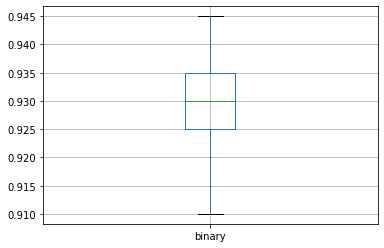

Epoch 1/10
57/57 - 2s - loss: 0.4759 - accuracy: 0.7683 - 2s/epoch - 28ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0744 - accuracy: 0.9867 - 584ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0174 - accuracy: 1.0000 - 588ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0072 - accuracy: 1.0000 - 577ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0038 - accuracy: 1.0000 - 522ms/epoch - 9ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0023 - accuracy: 1.0000 - 566ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0015 - accuracy: 1.0000 - 541ms/epoch - 9ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 556ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 8.0154e-04 - accuracy: 1.0000 - 581ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 6.2190e-04 - accuracy: 1.0000 - 557ms/epoch - 10ms/step
1 accuracy: 0.8949999809265137
Epoch 1/10
57/57 - 1s - loss: 0.4662 - accuracy: 0.7672 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0526 - accuracy: 0.9933 - 580ms/ep

Epoch 7/10
57/57 - 1s - loss: 0.0016 - accuracy: 1.0000 - 585ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 566ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 8.4149e-04 - accuracy: 1.0000 - 583ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 6.5606e-04 - accuracy: 1.0000 - 531ms/epoch - 9ms/step
10 accuracy: 0.8999999761581421
Epoch 1/10
57/57 - 1s - loss: 0.4973 - accuracy: 0.7589 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0694 - accuracy: 0.9894 - 579ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0176 - accuracy: 1.0000 - 533ms/epoch - 9ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0068 - accuracy: 1.0000 - 531ms/epoch - 9ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0038 - accuracy: 1.0000 - 551ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0024 - accuracy: 1.0000 - 538ms/epoch - 9ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0015 - accuracy: 1.0000 - 576ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0010 - accuracy: 1.0000 - 570ms/

Epoch 3/10
57/57 - 1s - loss: 0.0123 - accuracy: 1.0000 - 592ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0061 - accuracy: 1.0000 - 599ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0033 - accuracy: 1.0000 - 597ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0021 - accuracy: 1.0000 - 588ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0014 - accuracy: 1.0000 - 570ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 612ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 8.0075e-04 - accuracy: 1.0000 - 588ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 6.3328e-04 - accuracy: 1.0000 - 584ms/epoch - 10ms/step
20 accuracy: 0.9049999713897705
Epoch 1/10
57/57 - 1s - loss: 0.4603 - accuracy: 0.7856 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0583 - accuracy: 0.9900 - 589ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0145 - accuracy: 1.0000 - 578ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0064 - accuracy: 1.0000 - 61

Epoch 9/10
57/57 - 0s - loss: 7.9099e-04 - accuracy: 1.0000 - 461ms/epoch - 8ms/step
Epoch 10/10
57/57 - 0s - loss: 6.0728e-04 - accuracy: 1.0000 - 482ms/epoch - 8ms/step
29 accuracy: 0.9049999713897705
Epoch 1/10
57/57 - 1s - loss: 0.4574 - accuracy: 0.7839 - 1s/epoch - 20ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0605 - accuracy: 0.9894 - 594ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0157 - accuracy: 0.9994 - 570ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0069 - accuracy: 1.0000 - 595ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0041 - accuracy: 1.0000 - 592ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.0023 - accuracy: 1.0000 - 587ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.0014 - accuracy: 1.0000 - 597ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 8.8049e-04 - accuracy: 1.0000 - 595ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 6.1423e-04 - accuracy: 1.0000 - 640ms/epoch - 11ms/step
Epoch 10/10
57/57 - 1s - loss: 4.4641e-04 - accuracy: 

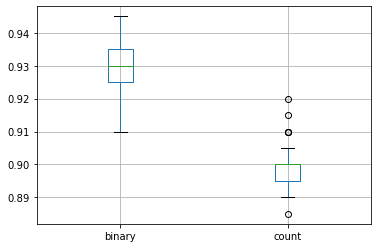

Epoch 1/10
57/57 - 1s - loss: 0.4814 - accuracy: 0.7467 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0151 - accuracy: 0.9994 - 592ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0035 - accuracy: 1.0000 - 604ms/epoch - 11ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0018 - accuracy: 1.0000 - 610ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0012 - accuracy: 1.0000 - 603ms/epoch - 11ms/step
Epoch 6/10
57/57 - 1s - loss: 7.9767e-04 - accuracy: 1.0000 - 616ms/epoch - 11ms/step
Epoch 7/10
57/57 - 1s - loss: 5.7770e-04 - accuracy: 1.0000 - 596ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 4.3864e-04 - accuracy: 1.0000 - 571ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 3.3962e-04 - accuracy: 1.0000 - 574ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 2.7078e-04 - accuracy: 1.0000 - 594ms/epoch - 10ms/step
1 accuracy: 0.8799999952316284
Epoch 1/10
57/57 - 1s - loss: 0.4681 - accuracy: 0.7722 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0142 - accuracy: 0.9

Epoch 6/10
57/57 - 1s - loss: 8.1075e-04 - accuracy: 1.0000 - 593ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 5.9177e-04 - accuracy: 1.0000 - 580ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 4.4566e-04 - accuracy: 1.0000 - 600ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 3.5116e-04 - accuracy: 1.0000 - 593ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 2.7848e-04 - accuracy: 1.0000 - 578ms/epoch - 10ms/step
10 accuracy: 0.875
Epoch 1/10
57/57 - 1s - loss: 0.4894 - accuracy: 0.7617 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0195 - accuracy: 0.9978 - 591ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0036 - accuracy: 1.0000 - 589ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0018 - accuracy: 1.0000 - 620ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0011 - accuracy: 1.0000 - 639ms/epoch - 11ms/step
Epoch 6/10
57/57 - 1s - loss: 7.6671e-04 - accuracy: 1.0000 - 617ms/epoch - 11ms/step
Epoch 7/10
57/57 - 1s - loss: 5.4912e-04 - accuracy: 1.00

19 accuracy: 0.8650000095367432
Epoch 1/10
57/57 - 1s - loss: 0.4836 - accuracy: 0.7639 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0178 - accuracy: 0.9989 - 617ms/epoch - 11ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0040 - accuracy: 1.0000 - 606ms/epoch - 11ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0021 - accuracy: 1.0000 - 600ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0013 - accuracy: 1.0000 - 653ms/epoch - 11ms/step
Epoch 6/10
57/57 - 1s - loss: 8.9688e-04 - accuracy: 1.0000 - 618ms/epoch - 11ms/step
Epoch 7/10
57/57 - 1s - loss: 6.5078e-04 - accuracy: 1.0000 - 608ms/epoch - 11ms/step
Epoch 8/10
57/57 - 1s - loss: 4.9174e-04 - accuracy: 1.0000 - 604ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 3.7769e-04 - accuracy: 1.0000 - 631ms/epoch - 11ms/step
Epoch 10/10
57/57 - 1s - loss: 2.9674e-04 - accuracy: 1.0000 - 610ms/epoch - 11ms/step
20 accuracy: 0.8700000047683716
Epoch 1/10
57/57 - 1s - loss: 0.4709 - accuracy: 0.7733 - 1s/epoch - 25ms/step
Epoch 2/10
57/57 - 

Epoch 6/10
57/57 - 1s - loss: 7.1651e-04 - accuracy: 1.0000 - 578ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 5.1224e-04 - accuracy: 1.0000 - 571ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 3.8747e-04 - accuracy: 1.0000 - 571ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 2.9762e-04 - accuracy: 1.0000 - 564ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 2.3802e-04 - accuracy: 1.0000 - 572ms/epoch - 10ms/step
29 accuracy: 0.8799999952316284
Epoch 1/10
57/57 - 1s - loss: 0.4884 - accuracy: 0.7578 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.0186 - accuracy: 0.9994 - 576ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.0044 - accuracy: 1.0000 - 583ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.0021 - accuracy: 1.0000 - 581ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.0012 - accuracy: 1.0000 - 589ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 8.2893e-04 - accuracy: 1.0000 - 574ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 5.8683e-04 - a

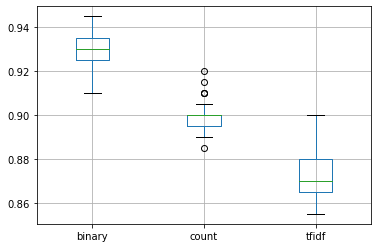

Epoch 1/10
57/57 - 1s - loss: 0.6920 - accuracy: 0.6139 - 1s/epoch - 24ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6848 - accuracy: 0.5944 - 606ms/epoch - 11ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6705 - accuracy: 0.8278 - 612ms/epoch - 11ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6455 - accuracy: 0.9267 - 599ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.6122 - accuracy: 0.9372 - 595ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5741 - accuracy: 0.9322 - 602ms/epoch - 11ms/step
Epoch 7/10
57/57 - 1s - loss: 0.5306 - accuracy: 0.9517 - 597ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.4863 - accuracy: 0.9533 - 607ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 0.4432 - accuracy: 0.9517 - 615ms/epoch - 11ms/step
Epoch 10/10
57/57 - 1s - loss: 0.4021 - accuracy: 0.9639 - 604ms/epoch - 11ms/step
1 accuracy: 0.8600000143051147
Epoch 1/10
57/57 - 1s - loss: 0.6924 - accuracy: 0.5511 - 1s/epoch - 25ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6871 - accuracy: 0.7222 - 636ms/epoch - 

Epoch 8/10
57/57 - 1s - loss: 0.4511 - accuracy: 0.9544 - 593ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 0.4063 - accuracy: 0.9633 - 579ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 0.3648 - accuracy: 0.9694 - 595ms/epoch - 10ms/step
10 accuracy: 0.8650000095367432
Epoch 1/10
57/57 - 1s - loss: 0.6917 - accuracy: 0.5367 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6831 - accuracy: 0.7578 - 562ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6660 - accuracy: 0.8628 - 568ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6391 - accuracy: 0.8256 - 576ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.6034 - accuracy: 0.9156 - 565ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5619 - accuracy: 0.9356 - 579ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.5171 - accuracy: 0.9450 - 577ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.4721 - accuracy: 0.9533 - 587ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 0.4281 - accuracy: 0.9561 - 591ms/epoc

Epoch 5/10
57/57 - 1s - loss: 0.6056 - accuracy: 0.9211 - 589ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5641 - accuracy: 0.9450 - 574ms/epoch - 10ms/step
Epoch 7/10
57/57 - 1s - loss: 0.5196 - accuracy: 0.9494 - 581ms/epoch - 10ms/step
Epoch 8/10
57/57 - 1s - loss: 0.4736 - accuracy: 0.9506 - 590ms/epoch - 10ms/step
Epoch 9/10
57/57 - 1s - loss: 0.4303 - accuracy: 0.9606 - 582ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 0.3877 - accuracy: 0.9633 - 590ms/epoch - 10ms/step
20 accuracy: 0.8700000047683716
Epoch 1/10
57/57 - 1s - loss: 0.6920 - accuracy: 0.5783 - 1s/epoch - 23ms/step
Epoch 2/10
57/57 - 1s - loss: 0.6848 - accuracy: 0.6539 - 576ms/epoch - 10ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6710 - accuracy: 0.7039 - 573ms/epoch - 10ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6480 - accuracy: 0.8711 - 571ms/epoch - 10ms/step
Epoch 5/10
57/57 - 1s - loss: 0.6180 - accuracy: 0.9222 - 581ms/epoch - 10ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5833 - accuracy: 0.9383 - 554ms/epoc

Epoch 2/10
57/57 - 1s - loss: 0.6849 - accuracy: 0.7172 - 604ms/epoch - 11ms/step
Epoch 3/10
57/57 - 1s - loss: 0.6690 - accuracy: 0.8861 - 602ms/epoch - 11ms/step
Epoch 4/10
57/57 - 1s - loss: 0.6440 - accuracy: 0.9200 - 610ms/epoch - 11ms/step
Epoch 5/10
57/57 - 1s - loss: 0.6094 - accuracy: 0.9328 - 629ms/epoch - 11ms/step
Epoch 6/10
57/57 - 1s - loss: 0.5685 - accuracy: 0.9372 - 636ms/epoch - 11ms/step
Epoch 7/10
57/57 - 1s - loss: 0.5245 - accuracy: 0.9428 - 634ms/epoch - 11ms/step
Epoch 8/10
57/57 - 1s - loss: 0.4787 - accuracy: 0.9522 - 620ms/epoch - 11ms/step
Epoch 9/10
57/57 - 1s - loss: 0.4347 - accuracy: 0.9567 - 564ms/epoch - 10ms/step
Epoch 10/10
57/57 - 1s - loss: 0.3927 - accuracy: 0.9617 - 597ms/epoch - 10ms/step
30 accuracy: 0.8700000047683716
          binary      count      tfidf       freq
count  30.000000  30.000000  30.000000  30.000000
mean    0.929333   0.899500   0.873333   0.868500
std     0.008976   0.007696   0.011167   0.005594
min     0.910000   0.885000  

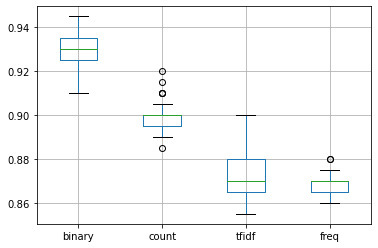

In [46]:
# Will take long time
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)
    # summarize results
    print(results.describe())
    # plot results
    results.boxplot()
    pyplot.show()

### Predicting Sentiment for New Reviews

In [21]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, model):
    # clean
    tokens = clean_doc(review)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    # convert to line
    line = ' '.join(tokens)
    # encode
    encoded = tokenizer.texts_to_matrix([line], mode='binary')
    # predict sentiment
    yhat = model.predict(encoded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [22]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))
# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVE (99.991%)
Review: [This is a bad movie.]
Sentiment: NEGATIVE (99.961%)


In [44]:
# test positive text
text = "the movie was extremely bad"
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))


Review: [the movie was extremely bad]
Sentiment: NEGATIVE (99.595%)


## Chapter 11

### The Word Embedding Model

A word embedding is a learned representation for text where words that have the same meaning
have a similar representation.

### Word Embedding Algorithms
1. Embedding Layer
2. Word2Vec: 
Word2Vec is a statistical method for eficiently learning a standalone word embedding from a
text corpus. It was developed by Tomas Mikolov, et al. at Google in 2013 as a response to make
the neural-network-based training of the embedding more ecient and since then has become
the de facto standard for developing pre-trained word embedding.
Additionally, the work involved analysis of the learned vectors and the exploration of vector
math on the representations of words. For example, that subtracting the man-ness from King
and adding women-ness results in the word Queen, capturing the analogy king is to queen as
man is to woman.

    Two methods of Word2Vec are - 
        i) Continuous Bag-of-Words, or CBOW model.
        ii) Continuous Skip-Gram Model.
3. GloVe: GloVe, is a new global log-bilinear regression model for the unsupervised learning of
word representations that outperforms other models on word analogy, word similarity,
and named entity recognition tasks.

## Chapter 12

### How to Develop Word Embeddings with Gensim

#### Develop Word2Vec Embedding

In [60]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]

# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.key_to_index)
print(words)
# access vector for one word
#print(model['sentence'])
print(model.wv.get_vector('sentence'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['sentence', 'the', 'is', 'this', 'final', 'and', 'more', 'one', 'another', 'yet', 'second', 'word2vec', 'for', 'first']
[-5.3622725e-04  2.3643016e-04  5.1033497e-03  9.0092728e-03
 -9.3029495e-03 -7.1168090e-03  6.4588715e-03  8.9729885e-03
 -5.0154282e-03 -3.7633730e-03  7.3805046e-03 -1.5334726e-03
 -4.5366143e-03  6.5540504e-03 -4.8601604e-03 -1.8160177e-03
  2.8765798e-03  9.9187379e-04 -8.2852151e-03 -9.4488189e-03
  7.3117660e-03  5.0702621e-03  6.7576934e-03  7.6286553e-04
  6.3508893e-03 -3.4053659e-03 -9.4640255e-04  5.7685734e-03
 -7.5216386e-03 -3.9361049e-03 -7.5115822e-03 -9.3004224e-04
  9.5381187e-03 -7.3191668e-03 -2.3337698e-03 -1.9377422e-03
  8.0774352e-03 -5.9308959e-03  4.5161247e-05 -4.7537349e-03
 -9.6035507e-03  5.0072931e-03 -8.7595871e-03 -4.3918253e-03
 -3.5099984e-05 -2.9618264e-04 -7.6612402e-03  9.6147414e-03
  4.9820566e-03  9.2331432e-03 -8.1579182e-03  4.4957972e-03
 -4.1370774e-03  8.2453492e-04  8.498

In [78]:
# Visualize Word Embedding
X = model.wv.vectors
X

array([[-5.3622725e-04,  2.3643016e-04,  5.1033497e-03, ...,
        -7.0415614e-03,  9.0145587e-04,  6.3925339e-03],
       [-8.6196875e-03,  3.6657380e-03,  5.1898835e-03, ...,
        -2.3915148e-03, -9.5100952e-03,  4.5058774e-03],
       [ 9.4563962e-05,  3.0773187e-03, -6.8126465e-03, ...,
         5.1259040e-04,  8.2130842e-03, -7.0190406e-03],
       ...,
       [ 9.7702928e-03,  8.1651136e-03,  1.2809705e-03, ...,
        -2.9727411e-03, -4.9318983e-03, -2.3151112e-03],
       [-1.9442177e-03, -5.2675223e-03,  9.4471117e-03, ...,
         5.9827138e-03,  6.8153618e-03,  7.8225443e-03],
       [-9.5001198e-03,  9.5622232e-03, -7.7707553e-03, ...,
        -3.1351089e-03, -6.3388203e-03,  9.8700766e-03]], dtype=float32)

In [58]:
model.wv.key_to_index

{'sentence': 0,
 'the': 1,
 'is': 2,
 'this': 3,
 'final': 4,
 'and': 5,
 'more': 6,
 'one': 7,
 'another': 8,
 'yet': 9,
 'second': 10,
 'word2vec': 11,
 'for': 12,
 'first': 13}

In [61]:
model.wv.index_to_key

['sentence',
 'the',
 'is',
 'this',
 'final',
 'and',
 'more',
 'one',
 'another',
 'yet',
 'second',
 'word2vec',
 'for',
 'first']

#### Plot Word Vectors Using PCA

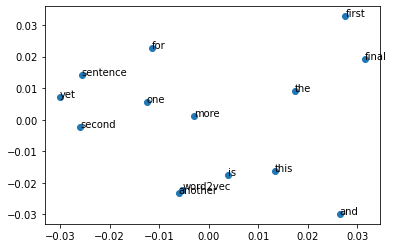

In [80]:
# define training data
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

#### Load Google's Word2Vec Embedding

In [ ]:
# load the google word2vec model
# downloaded the pre-trained model of word2vec
filename = '../Data/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

#### Load Stanford's GloVe Embedding

In [ ]:
# convert glove to word2vec format
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

# load the converted model
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

## Chapter 13

### How to Learn and Load Word Embeddings in Keras

In [98]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]

# integer encode the documents
vocab_size = 50
encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 8, input_length=max_length))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

# fit the model
padded_docs = np.asarray(padded_docs)
labels = np.asarray(labels)
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[10, 35], [28, 40], [20, 27], [44, 40], [17], [29], [19, 27], [21, 28], [19, 40], [3, 1, 35, 23]]
[[10 35  0  0]
 [28 40  0  0]
 [20 27  0  0]
 [44 40  0  0]
 [17  0  0  0]
 [29  0  0  0]
 [19 27  0  0]
 [21 28  0  0]
 [19 40  0  0]
 [ 3  1 35 23]]
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 4, 8)              400       
                                                                 
 flatten_6 (Flatten)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
Accuracy: 80.000001


### Example of Using Pre-Trained GloVe Embedding

In [99]:
# define documents
docs = ['Well done!',
'Good work',
'Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


In [104]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('../Models/glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [106]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [108]:
for word, i in t.word_index.items():
    print(word, i)

work 1
done 2
good 3
effort 4
poor 5
well 6
great 7
nice 8
excellent 9
weak 10
not 11
could 12
have 13
better 14


In [107]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.11619   ,  0.45447001, -0.69216001, ..., -0.54737002,
         0.48822001,  0.32246   ],
       [-0.2978    ,  0.31147   , -0.14937   , ..., -0.22709   ,
        -0.029261  ,  0.4585    ],
       ...,
       [ 0.05869   ,  0.40272999,  0.38633999, ..., -0.35973999,
         0.43718001,  0.10121   ],
       [ 0.15711001,  0.65605998,  0.0021149 , ..., -0.60614997,
         0.71004999,  0.41468999],
       [-0.047543  ,  0.51914001,  0.34283999, ..., -0.26859   ,
         0.48664999,  0.55609   ]])

In [111]:
# define model
model = Sequential()
e = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=4, trainable=False)
model.add(e)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()

# fit the model
labels = np.asarray(labels)
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 4, 100)            1500      
                                                                 
 flatten_9 (Flatten)         (None, 400)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 401       
                                                                 
Total params: 1,901
Trainable params: 401
Non-trainable params: 1,500
_________________________________________________________________
Accuracy: 100.000000


## Chapter 14

### Neural Models for Document Classification

## Chapter 15

### Project: Develop an Embedding + CNN Model for Sentiment Analysis

In [112]:
# Train CNN With Embedding Layer

In [163]:
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)

Maximum length: 1317


In [164]:
# integer encode and pad documents
def encode_docs(tokenizer, max_length, docs):
    # integer encode
    encoded = tokenizer.texts_to_sequences(docs)
    # pad sequences
    padded = pad_sequences(encoded, maxlen=max_length, padding='post')
    return padded

In [165]:
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)

Vocabulary size: 25768


In [166]:
# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 100, input_length=max_length))
    model.add(Conv1D(filters=32, kernel_size=8, activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [167]:
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)

In [168]:
# define model
model = define_model(vocab_size, max_length)

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 1317, 100)         2576800   
                                                                 
 conv1d_8 (Conv1D)           (None, 1310, 32)          25632     
                                                                 
 max_pooling1d_8 (MaxPooling  (None, 655, 32)          0         
 1D)                                                             
                                                                 
 flatten_18 (Flatten)        (None, 20960)             0         
                                                                 
 dense_20 (Dense)            (None, 10)                209610    
                                                                 
 dense_21 (Dense)            (None, 1)                 11        
                                                     

In [169]:
# save the model
model.save('model.h5')

In [170]:
# Evaluate Model

In [171]:
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)
# create the tokenizer
tokenizer = create_tokenizer(train_docs)
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# calculate the maximum sequence length
max_length = max([len(s.split()) for s in train_docs])
print('Maximum length: %d' % max_length)
# encode data
Xtrain = encode_docs(tokenizer, max_length, train_docs)
Xtest = encode_docs(tokenizer, max_length, test_docs)

Vocabulary size: 25768
Maximum length: 1317


In [172]:
# load the model
model = load_model('model.h5')

# evaluate model on training dataset
ytrain = np.array(ytrain)
ytest = np.array(ytest)
_, acc = model.evaluate(Xtrain, ytrain, verbose=0)
print('Train Accuracy: %f' % (acc*100))
# evaluate model on test dataset
_, acc = model.evaluate(Xtest, ytest, verbose=0)
print('Test Accuracy: %f' % (acc*100))

Train Accuracy: 100.000000
Test Accuracy: 88.999999


In [173]:
# classify a review as negative or positive
def predict_sentiment(review, vocab, tokenizer, max_length, model):
    # clean review
    line = clean_doc(review, vocab)
    # encode and pad review
    padded = encode_docs(tokenizer, max_length, [line])
    # predict sentiment
    yhat = model.predict(padded, verbose=0)
    # retrieve predicted percentage and label
    percent_pos = yhat[0,0]
    if round(percent_pos) == 0:
        return (1-percent_pos), 'NEGATIVE'
    return percent_pos, 'POSITIVE'

In [174]:
# turn a doc into clean tokens
def clean_doc(doc, vocab):
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # filter out tokens not in vocab
    tokens = [w for w in tokens if w in vocab]
    tokens = ' '.join(tokens)
    return tokens

In [175]:
text = 'Everyone will enjoy this film. I love it, recommended!'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a bad movie. Do not watch it. It sucks.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, max_length, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Everyone will enjoy this film. I love it, recommended!]
Sentiment: POSITIVE (50.053%)
Review: [This is a bad movie. Do not watch it. It sucks.]
Sentiment: NEGATIVE (54.251%)


## Chapter 16

### Project: Develop an n-gram CNN Model for Sentiment Analysis

In [176]:
from pickle import load
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import concatenate

In [177]:
# load a clean dataset
def load_dataset(filename):
    return load(open(filename, 'rb'))

# fit a tokenizer
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

# calculate the maximum document length
def max_length(lines):
    return max([len(s.split()) for s in lines])

# encode a list of lines
def encode_text(tokenizer, lines, length):
    # integer encode
    encoded = tokenizer.texts_to_sequences(lines)
    # pad encoded sequences
    padded = pad_sequences(encoded, maxlen=length, padding='post')
    return padded

In [178]:
# define the model
def define_model(length, vocab_size):
    # channel 1
    inputs1 = Input(shape=(length,))
    embedding1 = Embedding(vocab_size, 100)(inputs1)
    conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
    drop1 = Dropout(0.5)(conv1)
    pool1 = MaxPooling1D(pool_size=2)(drop1)
    flat1 = Flatten()(pool1)
    # channel 2
    inputs2 = Input(shape=(length,))
    embedding2 = Embedding(vocab_size, 100)(inputs2)
    conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
    drop2 = Dropout(0.5)(conv2)
    pool2 = MaxPooling1D(pool_size=2)(drop2)
    flat2 = Flatten()(pool2)
    # channel 3
    inputs3 = Input(shape=(length,))
    embedding3 = Embedding(vocab_size, 100)(inputs3)
    conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling1D(pool_size=2)(drop3)
    flat3 = Flatten()(pool3)
    # merge
    merged = concatenate([flat1, flat2, flat3])
    # interpretation
    dense1 = Dense(10, activation='relu')(merged)
    outputs = Dense(1, activation='sigmoid')(dense1)
    model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
    # compile
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize
    model.summary()
    plot_model(model, show_shapes=True, to_file='model.png')
    return model



In [179]:
trainLines, trainLabels = train_docs, ytrain
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
# define model
model = define_model(length, vocab_size)
# fit model
model.fit([trainX,trainX,trainX], trainLabels, epochs=7, batch_size=16)
# save the model
model.save('model_ng_cnn.h5')

Max document length: 1317
Vocabulary size: 25768
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 1317)]       0           []                               
                                                                                                  
 input_8 (InputLayer)           [(None, 1317)]       0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 1317)]       0           []                               
                                                                                                  
 embedding_20 (Embedding)       (None, 1317, 100)    2576800     ['input_7[0][0]']                
                                           

In [151]:
# Evaluate Model

In [180]:
trainLines, trainLabels = train_docs, ytrain
testLines, testLabels = test_docs, ytest
# create tokenizer
tokenizer = create_tokenizer(trainLines)
# calculate max document length
length = max_length(trainLines)
print('Max document length: %d' % length)
# calculate vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary size: %d' % vocab_size)
# encode data
trainX = encode_text(tokenizer, trainLines, length)
testX = encode_text(tokenizer, testLines, length)
# load the model
model = load_model('model_ng_cnn.h5')
# evaluate model on training dataset
_, acc = model.evaluate([trainX,trainX,trainX], trainLabels, verbose=0)
print('Train Accuracy: %.2f' % (acc*100))
# evaluate model on test dataset dataset
_, acc = model.evaluate([testX,testX,testX], testLabels, verbose=0)
print('Test Accuracy: %.2f' % (acc*100))

Max document length: 1317
Vocabulary size: 25768
Train Accuracy: 100.00
Test Accuracy: 86.50


## Chapter 17

### Neural Language Modeling (NLM)

Language modeling is the art of determining the probability of a sequence of words.
This is useful in a large variety of areas including speech recognition, optical character
recognition, handwriting recognition, machine translation, and spelling correction

## Chapter 18

### How to Develop a Character-Based Neural Language Model

In [48]:
from pickle import dump
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from pickle import load

In [4]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

# load text
raw_text = load_doc('../Data/rhyme.txt')
print(raw_text)

# clean
tokens = raw_text.split()
raw_text = ' '.join(tokens)

# organize into sequences of characters
length = 10
sequences = list()
for i in range(length, len(raw_text)):
    # select sequence of tokens
    seq = raw_text[i-length:i+1]
    # store
    sequences.append(seq)

print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = 'char_sequences.txt'
save_doc(sequences, out_filename)

Sing a song of sixpence,
A pocket full of rye.
Four and twenty blackbirds,
Baked in a pie.
When the pie was opened
The birds began to sing;
Wasn't that a dainty dish,
To set before the king.
The king was in his counting house,
Counting out his money;
The queen was in the parlour,
Eating bread and honey.
The maid was in the garden,
Hanging out the clothes,
When down came a blackbird
And pecked off her nose.
Total Sequences: 399


In [5]:
# load
in_filename = 'char_sequences.txt'
raw_text = load_doc(in_filename)
lines = raw_text.split('\n')

In [8]:
chars = sorted(list(set(raw_text)))
mapping = dict((c, i) for i, c in enumerate(chars))

In [29]:
mapping

{'\n': 0,
 ' ': 1,
 "'": 2,
 ',': 3,
 '.': 4,
 ';': 5,
 'A': 6,
 'B': 7,
 'C': 8,
 'E': 9,
 'F': 10,
 'H': 11,
 'S': 12,
 'T': 13,
 'W': 14,
 'a': 15,
 'b': 16,
 'c': 17,
 'd': 18,
 'e': 19,
 'f': 20,
 'g': 21,
 'h': 22,
 'i': 23,
 'k': 24,
 'l': 25,
 'm': 26,
 'n': 27,
 'o': 28,
 'p': 29,
 'q': 30,
 'r': 31,
 's': 32,
 't': 33,
 'u': 34,
 'w': 35,
 'x': 36,
 'y': 37}

In [33]:
sequences = list()
for line in lines:
    # integer encode line
    encoded_seq = [mapping[char] for char in line]
    # store
    sequences.append(encoded_seq)

In [34]:
print(len(sequences))
sequences

399


[[12, 23, 27, 21, 1, 15, 1, 32, 28, 27, 21],
 [23, 27, 21, 1, 15, 1, 32, 28, 27, 21, 1],
 [27, 21, 1, 15, 1, 32, 28, 27, 21, 1, 28],
 [21, 1, 15, 1, 32, 28, 27, 21, 1, 28, 20],
 [1, 15, 1, 32, 28, 27, 21, 1, 28, 20, 1],
 [15, 1, 32, 28, 27, 21, 1, 28, 20, 1, 32],
 [1, 32, 28, 27, 21, 1, 28, 20, 1, 32, 23],
 [32, 28, 27, 21, 1, 28, 20, 1, 32, 23, 36],
 [28, 27, 21, 1, 28, 20, 1, 32, 23, 36, 29],
 [27, 21, 1, 28, 20, 1, 32, 23, 36, 29, 19],
 [21, 1, 28, 20, 1, 32, 23, 36, 29, 19, 27],
 [1, 28, 20, 1, 32, 23, 36, 29, 19, 27, 17],
 [28, 20, 1, 32, 23, 36, 29, 19, 27, 17, 19],
 [20, 1, 32, 23, 36, 29, 19, 27, 17, 19, 3],
 [1, 32, 23, 36, 29, 19, 27, 17, 19, 3, 1],
 [32, 23, 36, 29, 19, 27, 17, 19, 3, 1, 6],
 [23, 36, 29, 19, 27, 17, 19, 3, 1, 6, 1],
 [36, 29, 19, 27, 17, 19, 3, 1, 6, 1, 29],
 [29, 19, 27, 17, 19, 3, 1, 6, 1, 29, 28],
 [19, 27, 17, 19, 3, 1, 6, 1, 29, 28, 17],
 [27, 17, 19, 3, 1, 6, 1, 29, 28, 17, 24],
 [17, 19, 3, 1, 6, 1, 29, 28, 17, 24, 19],
 [19, 3, 1, 6, 1, 29, 28, 17, 

In [10]:
# vocabulary size
vocab_size = len(mapping)
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38


In [35]:
# Split Inputs and Output
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]

In [39]:
print(sequences.shape)
print(X.shape)
print(y.shape)
print('sequences', '\n', sequences)
print('X', '\n', X)
print('y', '\n', y)

(399, 11)
(399, 10)
(399,)
sequences 
 [[12 23 27 ... 28 27 21]
 [23 27 21 ... 27 21  1]
 [27 21  1 ... 21  1 28]
 ...
 [28 20 20 ... 27 28 32]
 [20 20  1 ... 28 32 19]
 [20  1 22 ... 32 19  4]]
X 
 [[12 23 27 ... 32 28 27]
 [23 27 21 ... 28 27 21]
 [27 21  1 ... 27 21  1]
 ...
 [28 20 20 ...  1 27 28]
 [20 20  1 ... 27 28 32]
 [20  1 22 ... 28 32 19]]
y 
 [21  1 28 20  1 32 23 36 29 19 27 17 19  3  1  6  1 29 28 17 24 19 33  1
 20 34 25 25  1 28 20  1 31 37 19  4  1 10 28 34 31  1 15 27 18  1 33 35
 19 27 33 37  1 16 25 15 17 24 16 23 31 18 32  3  1  7 15 24 19 18  1 23
 27  1 15  1 29 23 19  4  1 14 22 19 27  1 33 22 19  1 29 23 19  1 35 15
 32  1 28 29 19 27 19 18  1 13 22 19  1 16 23 31 18 32  1 16 19 21 15 27
  1 33 28  1 32 23 27 21  5  1 14 15 32 27  2 33  1 33 22 15 33  1 15  1
 18 15 23 27 33 37  1 18 23 32 22  3  1 13 28  1 32 19 33  1 16 19 20 28
 31 19  1 33 22 19  1 24 23 27 21  4  1 13 22 19  1 24 23 27 21  1 35 15
 32  1 23 27  1 22 23 32  1 17 28 34 27 33 23 27 21  1 22

In [28]:
sequences[0]

array([12, 23, 27, 21,  1, 15,  1, 32, 28, 27, 21])

In [27]:
to_categorical(sequences[0], num_classes=vocab_size)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [40]:
sequences = [to_categorical(x, num_classes=vocab_size) for x in X]
X = np.array(sequences)
y = to_categorical(y, num_classes=vocab_size)

In [42]:
print(len(sequences))
print(X.shape)
print(y.shape)
print('sequences', '\n', sequences)
print('X', '\n', X)
print('y', '\n', y)

399
(399, 10, 38)
(399, 38)
sequences 
 [array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
  

In [43]:
# define the model
def define_model(X):
    model = Sequential()
    model.add(LSTM(75, input_shape=(X.shape[1], X.shape[2])))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [44]:
# define model
model = define_model(X)
# fit model
model.fit(X, y, epochs=100, verbose=2)
# save the model to file
model.save('model_char_NLM.h5')
# save the mapping
dump(mapping, open('mapping_char_NLM.pkl', 'wb'))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 75)                34200     
                                                                 
 dense (Dense)               (None, 38)                2888      
                                                                 
Total params: 37,088
Trainable params: 37,088
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/100
13/13 - 3s - loss: 3.6104 - accuracy: 0.0877 - 3s/epoch - 245ms/step
Epoch 2/100
13/13 - 0s - loss: 3.4912 - accuracy: 0.1905 - 83ms/epoch - 6ms/step
Epoch 3/100
13/13 - 0s - loss: 3.1700 - accuracy: 0.1905 - 72ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 3.0526 - acc

Epoch 91/100
13/13 - 0s - loss: 0.3046 - accuracy: 0.9850 - 67ms/epoch - 5ms/step
Epoch 92/100
13/13 - 0s - loss: 0.2859 - accuracy: 0.9875 - 64ms/epoch - 5ms/step
Epoch 93/100
13/13 - 0s - loss: 0.2762 - accuracy: 0.9850 - 67ms/epoch - 5ms/step
Epoch 94/100
13/13 - 0s - loss: 0.2679 - accuracy: 0.9900 - 61ms/epoch - 5ms/step
Epoch 95/100
13/13 - 0s - loss: 0.2530 - accuracy: 0.9900 - 66ms/epoch - 5ms/step
Epoch 96/100
13/13 - 0s - loss: 0.2487 - accuracy: 0.9925 - 62ms/epoch - 5ms/step
Epoch 97/100
13/13 - 0s - loss: 0.2455 - accuracy: 0.9850 - 63ms/epoch - 5ms/step
Epoch 98/100
13/13 - 0s - loss: 0.2331 - accuracy: 0.9875 - 67ms/epoch - 5ms/step
Epoch 99/100
13/13 - 0s - loss: 0.2317 - accuracy: 0.9925 - 66ms/epoch - 5ms/step
Epoch 100/100
13/13 - 0s - loss: 0.2200 - accuracy: 0.9925 - 61ms/epoch - 5ms/step


In [70]:
# generate a sequence of characters with a language model
def generate_seq(model, mapping, seq_length, seed_text, n_chars):
    in_text = seed_text
    # generate a fixed number of characters
    for _ in range(n_chars):
        # encode the characters as integers
        encoded = [mapping[char] for char in in_text]
        # truncate sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=seq_length, truncating='pre')
        # one hot encode
        encoded = to_categorical(encoded, num_classes=len(mapping))
        #encoded = encoded.reshape(1, encoded.shape[0], encoded.shape[1])
        # predict character
        #yhat = model.predict(encoded, verbose=0)
        yhat = np.argmax(model.predict(encoded, verbose=0), axis=-1)
        # reverse map integer to character
        out_char = ''
        for char, index in mapping.items():
            if index == yhat:
                out_char = char
                break
        # append to input
        in_text += out_char
    return in_text

In [71]:
# load the model
model = load_model('model_char_NLM.h5')
# load the mapping
mapping = load(open('mapping_char_NLM.pkl', 'rb'))

# test start of rhyme
print(generate_seq(model, mapping, 10, 'Sing a son', 20))
# test mid-line
print(generate_seq(model, mapping, 10, 'king was i', 20))
# test not in original
print(generate_seq(model, mapping, 10, 'hello worl', 20))

Sing a song of sixpence, A poc
king was in his counting house
hello worl efr kke roe wff  he


## Chapter 19

### How to Develop a Word-Based Neural Language Model

In [73]:
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

#### Model 1: One-Word-In, One-Word-Out Sequences

In [78]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
    in_text, result = seed_text, seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        encoded = array(encoded)
        # predict a word in the vocabulary
        #yhat = model.predict_classes(encoded, verbose=0)
        yhat = np.argmax(model.predict(encoded, verbose=0), axis=-1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text, result = out_word, result + ' ' + out_word
    return result

In [75]:
# define the model
def define_model(vocab_size):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [76]:
# source text
data = """ Jack and Jill went up the hill\n
To fetch a pail of water\n
Jack fell down and broke his crown\n
And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 22


In [79]:
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
    sequence = encoded[i-1:i+1]
    sequences.append(sequence)

print('Total Sequences: %d' % len(sequences))

# split into X and y elements
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]

# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

# define model
model = define_model(vocab_size)

# fit network
model.fit(X, y, epochs=500, verbose=2)


Total Sequences: 24
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             220       
                                                                 
 lstm_2 (LSTM)               (None, 50)                12200     
                                                                 
 dense_2 (Dense)             (None, 22)                1122      
                                                                 
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
1/1 - 2s - loss: 3.0906 - accuracy: 0.0833 - 2s/epoch - 2s/step
Epoch 2/500
1/1 - 0s - loss: 3.0898 - accuracy: 0.0833 -

Epoch 93/500
1/1 - 0s - loss: 2.8130 - accuracy: 0.1250 - 3ms/epoch - 3ms/step
Epoch 94/500
1/1 - 0s - loss: 2.8049 - accuracy: 0.1250 - 4ms/epoch - 4ms/step
Epoch 95/500
1/1 - 0s - loss: 2.7966 - accuracy: 0.1250 - 4ms/epoch - 4ms/step
Epoch 96/500
1/1 - 0s - loss: 2.7882 - accuracy: 0.1250 - 4ms/epoch - 4ms/step
Epoch 97/500
1/1 - 0s - loss: 2.7795 - accuracy: 0.1250 - 3ms/epoch - 3ms/step
Epoch 98/500
1/1 - 0s - loss: 2.7707 - accuracy: 0.1250 - 3ms/epoch - 3ms/step
Epoch 99/500
1/1 - 0s - loss: 2.7618 - accuracy: 0.1250 - 3ms/epoch - 3ms/step
Epoch 100/500
1/1 - 0s - loss: 2.7527 - accuracy: 0.1667 - 2ms/epoch - 2ms/step
Epoch 101/500
1/1 - 0s - loss: 2.7434 - accuracy: 0.1667 - 2ms/epoch - 2ms/step
Epoch 102/500
1/1 - 0s - loss: 2.7340 - accuracy: 0.1667 - 4ms/epoch - 4ms/step
Epoch 103/500
1/1 - 0s - loss: 2.7244 - accuracy: 0.1667 - 3ms/epoch - 3ms/step
Epoch 104/500
1/1 - 0s - loss: 2.7146 - accuracy: 0.1667 - 3ms/epoch - 3ms/step
Epoch 105/500
1/1 - 0s - loss: 2.7047 - accurac

Epoch 196/500
1/1 - 0s - loss: 1.6127 - accuracy: 0.7917 - 4ms/epoch - 4ms/step
Epoch 197/500
1/1 - 0s - loss: 1.6006 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 198/500
1/1 - 0s - loss: 1.5886 - accuracy: 0.7917 - 4ms/epoch - 4ms/step
Epoch 199/500
1/1 - 0s - loss: 1.5765 - accuracy: 0.7917 - 4ms/epoch - 4ms/step
Epoch 200/500
1/1 - 0s - loss: 1.5644 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 201/500
1/1 - 0s - loss: 1.5524 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 202/500
1/1 - 0s - loss: 1.5404 - accuracy: 0.7917 - 4ms/epoch - 4ms/step
Epoch 203/500
1/1 - 0s - loss: 1.5284 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 204/500
1/1 - 0s - loss: 1.5164 - accuracy: 0.7917 - 4ms/epoch - 4ms/step
Epoch 205/500
1/1 - 0s - loss: 1.5044 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 206/500
1/1 - 0s - loss: 1.4924 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 207/500
1/1 - 0s - loss: 1.4805 - accuracy: 0.7917 - 3ms/epoch - 3ms/step
Epoch 208/500
1/1 - 0s - loss: 1.4686 - 

Epoch 299/500
1/1 - 0s - loss: 0.6385 - accuracy: 0.8750 - 6ms/epoch - 6ms/step
Epoch 300/500
1/1 - 0s - loss: 0.6328 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 301/500
1/1 - 0s - loss: 0.6273 - accuracy: 0.8750 - 2ms/epoch - 2ms/step
Epoch 302/500
1/1 - 0s - loss: 0.6218 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 303/500
1/1 - 0s - loss: 0.6163 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 304/500
1/1 - 0s - loss: 0.6109 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 305/500
1/1 - 0s - loss: 0.6056 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 306/500
1/1 - 0s - loss: 0.6004 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 307/500
1/1 - 0s - loss: 0.5952 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 308/500
1/1 - 0s - loss: 0.5901 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 309/500
1/1 - 0s - loss: 0.5850 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 310/500
1/1 - 0s - loss: 0.5800 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 311/500
1/1 - 0s - loss: 0.5750 - 

Epoch 402/500
1/1 - 0s - loss: 0.3142 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 403/500
1/1 - 0s - loss: 0.3128 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 404/500
1/1 - 0s - loss: 0.3115 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 405/500
1/1 - 0s - loss: 0.3102 - accuracy: 0.8750 - 2ms/epoch - 2ms/step
Epoch 406/500
1/1 - 0s - loss: 0.3089 - accuracy: 0.8750 - 5ms/epoch - 5ms/step
Epoch 407/500
1/1 - 0s - loss: 0.3076 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 408/500
1/1 - 0s - loss: 0.3064 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 409/500
1/1 - 0s - loss: 0.3052 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 410/500
1/1 - 0s - loss: 0.3039 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 411/500
1/1 - 0s - loss: 0.3027 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 412/500
1/1 - 0s - loss: 0.3016 - accuracy: 0.8750 - 3ms/epoch - 3ms/step
Epoch 413/500
1/1 - 0s - loss: 0.3004 - accuracy: 0.8750 - 4ms/epoch - 4ms/step
Epoch 414/500
1/1 - 0s - loss: 0.2993 - 

In [80]:
# evaluate
print(generate_seq(model, tokenizer, 'Jack', 6))

Jack and jill went up the hill


#### Model 2: Line-by-Line Sequence

In [81]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        # yhat = model.predict_classes(encoded, verbose=0)
        yhat = np.argmax(model.predict(encoded, verbose=0), axis=-1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [82]:
# source text
data = """ Jack and Jill went up the hill\n
To fetch a pail of water\n
19.5. Model 2: Line-by-Line Sequence 221
Jack fell down and broke his crown\n
And Jill came tumbling after\n """

# prepare the tokenizer on the source text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

# create line-based sequences
sequences = list()
for line in data.split('\n'):
    encoded = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

print('Total Sequences: %d' % len(sequences))

# pad input sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(X, y, epochs=500, verbose=2)

Vocabulary Size: 30
Total Sequences: 29
Max Sequence Length: 9
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 8, 10)             300       
                                                                 
 lstm_3 (LSTM)               (None, 50)                12200     
                                                                 
 dense_3 (Dense)             (None, 30)                1530      
                                                                 
Total params: 14,030
Trainable params: 14,030
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
1/1 - 2s - loss: 3.4022 - accuracy: 0.0000e+00 - 2s/epoch - 2s/step
Epoch 2/5

Epoch 92/500
1/1 - 0s - loss: 2.1305 - accuracy: 0.4138 - 6ms/epoch - 6ms/step
Epoch 93/500
1/1 - 0s - loss: 2.1064 - accuracy: 0.4828 - 5ms/epoch - 5ms/step
Epoch 94/500
1/1 - 0s - loss: 2.0811 - accuracy: 0.4828 - 7ms/epoch - 7ms/step
Epoch 95/500
1/1 - 0s - loss: 2.0579 - accuracy: 0.4828 - 7ms/epoch - 7ms/step
Epoch 96/500
1/1 - 0s - loss: 2.0374 - accuracy: 0.5172 - 6ms/epoch - 6ms/step
Epoch 97/500
1/1 - 0s - loss: 2.0172 - accuracy: 0.5172 - 4ms/epoch - 4ms/step
Epoch 98/500
1/1 - 0s - loss: 1.9910 - accuracy: 0.5517 - 5ms/epoch - 5ms/step
Epoch 99/500
1/1 - 0s - loss: 1.9672 - accuracy: 0.5862 - 6ms/epoch - 6ms/step
Epoch 100/500
1/1 - 0s - loss: 1.9476 - accuracy: 0.5862 - 5ms/epoch - 5ms/step
Epoch 101/500
1/1 - 0s - loss: 1.9285 - accuracy: 0.5517 - 4ms/epoch - 4ms/step
Epoch 102/500
1/1 - 0s - loss: 1.9088 - accuracy: 0.5517 - 6ms/epoch - 6ms/step
Epoch 103/500
1/1 - 0s - loss: 1.8838 - accuracy: 0.5862 - 5ms/epoch - 5ms/step
Epoch 104/500
1/1 - 0s - loss: 1.8629 - accuracy

Epoch 195/500
1/1 - 0s - loss: 0.9347 - accuracy: 0.7931 - 5ms/epoch - 5ms/step
Epoch 196/500
1/1 - 0s - loss: 0.9283 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 197/500
1/1 - 0s - loss: 0.9232 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 198/500
1/1 - 0s - loss: 0.9190 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 199/500
1/1 - 0s - loss: 0.9149 - accuracy: 0.7931 - 5ms/epoch - 5ms/step
Epoch 200/500
1/1 - 0s - loss: 0.9114 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 201/500
1/1 - 0s - loss: 0.9062 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 202/500
1/1 - 0s - loss: 0.9020 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 203/500
1/1 - 0s - loss: 0.8949 - accuracy: 0.7931 - 5ms/epoch - 5ms/step
Epoch 204/500
1/1 - 0s - loss: 0.8885 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 205/500
1/1 - 0s - loss: 0.8811 - accuracy: 0.7931 - 5ms/epoch - 5ms/step
Epoch 206/500
1/1 - 0s - loss: 0.8747 - accuracy: 0.7931 - 6ms/epoch - 6ms/step
Epoch 207/500
1/1 - 0s - loss: 0.8693 - 

Epoch 298/500
1/1 - 0s - loss: 0.5505 - accuracy: 0.9310 - 6ms/epoch - 6ms/step
Epoch 299/500
1/1 - 0s - loss: 0.5717 - accuracy: 0.9310 - 5ms/epoch - 5ms/step
Epoch 300/500
1/1 - 0s - loss: 0.5217 - accuracy: 0.9310 - 5ms/epoch - 5ms/step
Epoch 301/500
1/1 - 0s - loss: 0.5807 - accuracy: 0.8966 - 6ms/epoch - 6ms/step
Epoch 302/500
1/1 - 0s - loss: 0.5872 - accuracy: 0.9310 - 6ms/epoch - 6ms/step
Epoch 303/500
1/1 - 0s - loss: 0.5413 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 304/500
1/1 - 0s - loss: 0.5804 - accuracy: 0.8966 - 6ms/epoch - 6ms/step
Epoch 305/500
1/1 - 0s - loss: 0.5089 - accuracy: 0.9310 - 6ms/epoch - 6ms/step
Epoch 306/500
1/1 - 0s - loss: 0.5477 - accuracy: 0.9310 - 5ms/epoch - 5ms/step
Epoch 307/500
1/1 - 0s - loss: 0.5013 - accuracy: 0.9310 - 6ms/epoch - 6ms/step
Epoch 308/500
1/1 - 0s - loss: 0.5414 - accuracy: 0.9310 - 5ms/epoch - 5ms/step
Epoch 309/500
1/1 - 0s - loss: 0.5007 - accuracy: 0.9310 - 7ms/epoch - 7ms/step
Epoch 310/500
1/1 - 0s - loss: 0.5247 - 

Epoch 401/500
1/1 - 0s - loss: 0.3169 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 402/500
1/1 - 0s - loss: 0.3154 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 403/500
1/1 - 0s - loss: 0.3139 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 404/500
1/1 - 0s - loss: 0.3125 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 405/500
1/1 - 0s - loss: 0.3110 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 406/500
1/1 - 0s - loss: 0.3095 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 407/500
1/1 - 0s - loss: 0.3081 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 408/500
1/1 - 0s - loss: 0.3067 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 409/500
1/1 - 0s - loss: 0.3052 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 410/500
1/1 - 0s - loss: 0.3038 - accuracy: 0.9655 - 6ms/epoch - 6ms/step
Epoch 411/500
1/1 - 0s - loss: 0.3024 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 412/500
1/1 - 0s - loss: 0.3010 - accuracy: 0.9655 - 5ms/epoch - 5ms/step
Epoch 413/500
1/1 - 0s - loss: 0.2996 - 

In [83]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack', 4))
print(generate_seq(model, tokenizer, max_length-1, 'Jill', 4))

Jack fell down and broke
Jill jill came came tumbling


#### Model 3: Two-Words-In, One-Word-Out Sequence

In [84]:
# generate a sequence from a language model
def generate_seq(model, tokenizer, max_length, seed_text, n_words):
    in_text = seed_text
    # generate a fixed number of words
    for _ in range(n_words):
        # encode the text as integer
        encoded = tokenizer.texts_to_sequences([in_text])[0]
        # pre-pad sequences to a fixed length
        encoded = pad_sequences([encoded], maxlen=max_length, padding='pre')
        # predict probabilities for each word
        # yhat = model.predict_classes(encoded, verbose=0)
        yhat = np.argmax(model.predict(encoded, verbose=0), axis=-1)
        # map predicted word index to word
        out_word = ''
        for word, index in tokenizer.word_index.items():
            if index == yhat:
                out_word = word
                break
        # append to input
        in_text += ' ' + out_word
    return in_text


# define the model
def define_model(vocab_size, max_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length-1))
    model.add(LSTM(50))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [85]:
# source text
data = """ Jack and Jill went up the hill\n
To fetch a pail of water\n
Jack fell down and broke his crown\n
And Jill came tumbling after\n """

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]

# retrieve vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

# encode 2 words -> 1 word
sequences = list()
for i in range(2, len(encoded)):
    sequence = encoded[i-2:i+1]
    sequences.append(sequence)

print('Total Sequences: %d' % len(sequences))

# pad sequences
max_length = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')
print('Max Sequence Length: %d' % max_length)

# split into input and output elements
sequences = array(sequences)
X, y = sequences[:,:-1],sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)

# define model
model = define_model(vocab_size, max_length)
# fit network
model.fit(X, y, epochs=500, verbose=2)

Vocabulary Size: 22
Total Sequences: 23
Max Sequence Length: 3
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2, 10)             220       
                                                                 
 lstm_4 (LSTM)               (None, 50)                12200     
                                                                 
 dense_4 (Dense)             (None, 22)                1122      
                                                                 
Total params: 13,542
Trainable params: 13,542
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
1/1 - 2s - loss: 3.0901 - accuracy: 0.1304 - 2s/epoch - 2s/step
Epoch 2/500
1

Epoch 92/500
1/1 - 0s - loss: 2.6081 - accuracy: 0.1739 - 4ms/epoch - 4ms/step
Epoch 93/500
1/1 - 0s - loss: 2.5907 - accuracy: 0.1739 - 4ms/epoch - 4ms/step
Epoch 94/500
1/1 - 0s - loss: 2.5729 - accuracy: 0.2174 - 5ms/epoch - 5ms/step
Epoch 95/500
1/1 - 0s - loss: 2.5546 - accuracy: 0.2174 - 3ms/epoch - 3ms/step
Epoch 96/500
1/1 - 0s - loss: 2.5358 - accuracy: 0.2174 - 3ms/epoch - 3ms/step
Epoch 97/500
1/1 - 0s - loss: 2.5166 - accuracy: 0.2174 - 5ms/epoch - 5ms/step
Epoch 98/500
1/1 - 0s - loss: 2.4969 - accuracy: 0.2174 - 5ms/epoch - 5ms/step
Epoch 99/500
1/1 - 0s - loss: 2.4767 - accuracy: 0.2174 - 3ms/epoch - 3ms/step
Epoch 100/500
1/1 - 0s - loss: 2.4561 - accuracy: 0.2174 - 4ms/epoch - 4ms/step
Epoch 101/500
1/1 - 0s - loss: 2.4350 - accuracy: 0.2174 - 4ms/epoch - 4ms/step
Epoch 102/500
1/1 - 0s - loss: 2.4135 - accuracy: 0.2174 - 3ms/epoch - 3ms/step
Epoch 103/500
1/1 - 0s - loss: 2.3916 - accuracy: 0.3043 - 5ms/epoch - 5ms/step
Epoch 104/500
1/1 - 0s - loss: 2.3692 - accuracy

Epoch 195/500
1/1 - 0s - loss: 0.3826 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 196/500
1/1 - 0s - loss: 0.3739 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 197/500
1/1 - 0s - loss: 0.3654 - accuracy: 0.9565 - 6ms/epoch - 6ms/step
Epoch 198/500
1/1 - 0s - loss: 0.3571 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 199/500
1/1 - 0s - loss: 0.3491 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 200/500
1/1 - 0s - loss: 0.3414 - accuracy: 0.9565 - 5ms/epoch - 5ms/step
Epoch 201/500
1/1 - 0s - loss: 0.3339 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 202/500
1/1 - 0s - loss: 0.3266 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 203/500
1/1 - 0s - loss: 0.3196 - accuracy: 0.9565 - 5ms/epoch - 5ms/step
Epoch 204/500
1/1 - 0s - loss: 0.3128 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 205/500
1/1 - 0s - loss: 0.3062 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 206/500
1/1 - 0s - loss: 0.2998 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 207/500
1/1 - 0s - loss: 0.2936 - 

Epoch 298/500
1/1 - 0s - loss: 0.1018 - accuracy: 0.9565 - 17ms/epoch - 17ms/step
Epoch 299/500
1/1 - 0s - loss: 0.1013 - accuracy: 0.9565 - 5ms/epoch - 5ms/step
Epoch 300/500
1/1 - 0s - loss: 0.1007 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 301/500
1/1 - 0s - loss: 0.1002 - accuracy: 0.9565 - 5ms/epoch - 5ms/step
Epoch 302/500
1/1 - 0s - loss: 0.0998 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 303/500
1/1 - 0s - loss: 0.0993 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 304/500
1/1 - 0s - loss: 0.0988 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 305/500
1/1 - 0s - loss: 0.0983 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 306/500
1/1 - 0s - loss: 0.0979 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 307/500
1/1 - 0s - loss: 0.0974 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 308/500
1/1 - 0s - loss: 0.0970 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 309/500
1/1 - 0s - loss: 0.0966 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 310/500
1/1 - 0s - loss: 0.0962 

Epoch 401/500
1/1 - 0s - loss: 0.0762 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 402/500
1/1 - 0s - loss: 0.0761 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 403/500
1/1 - 0s - loss: 0.0760 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 404/500
1/1 - 0s - loss: 0.0759 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 405/500
1/1 - 0s - loss: 0.0758 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 406/500
1/1 - 0s - loss: 0.0757 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 407/500
1/1 - 0s - loss: 0.0756 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 408/500
1/1 - 0s - loss: 0.0755 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 409/500
1/1 - 0s - loss: 0.0754 - accuracy: 0.9565 - 5ms/epoch - 5ms/step
Epoch 410/500
1/1 - 0s - loss: 0.0753 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 411/500
1/1 - 0s - loss: 0.0752 - accuracy: 0.9565 - 4ms/epoch - 4ms/step
Epoch 412/500
1/1 - 0s - loss: 0.0751 - accuracy: 0.9565 - 3ms/epoch - 3ms/step
Epoch 413/500
1/1 - 0s - loss: 0.0750 - 

In [86]:
# evaluate model
print(generate_seq(model, tokenizer, max_length-1, 'Jack and', 5))
print(generate_seq(model, tokenizer, max_length-1, 'And Jill', 3))
print(generate_seq(model, tokenizer, max_length-1, 'fell down', 5))
print(generate_seq(model, tokenizer, max_length-1, 'pail of', 5))

Jack and jill came tumbling after jill
And Jill came tumbling after
fell down and broke his crown and
pail of water jack fell down and


## Chapter 20

#### Project: Develop a Neural Language Model for Text Generation

In [87]:
import string
import re

In [89]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text


# turn a doc into clean tokens
def clean_doc(doc):
    # replace '--' with a space ' '
    doc = doc.replace('--', ' ')
    # split into tokens by white space
    tokens = doc.split()
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    # make lower case
    tokens = [word.lower() for word in tokens]
    return tokens

# save tokens to file, one dialog per line
def save_doc(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [91]:
# load document
in_filename = '../Data/republic_clean.txt'
doc = load_doc(in_filename)
print(doc[:200])

# clean document
tokens = clean_doc(doc)
print(tokens[:200])
print('Total Tokens: %d' % len(tokens))
print('Unique Tokens: %d' % len(set(tokens)))

# organize into sequences of tokens
length = 50 + 1
sequences = list()

for i in range(length, len(tokens)):
    # select sequence of tokens
    seq = tokens[i-length:i]
    # convert into a line
    line = ' '.join(seq)
    # store
    sequences.append(line)

print('Total Sequences: %d' % len(sequences))

# save sequences to file
out_filename = '../Data/republic_sequences.txt'
save_doc(sequences, out_filename)

ï»¿BOOK I.


I went down yesterday to the Piraeus with Glaucon the son of Ariston,
that I might offer up my prayers to the goddess (Bendis, the Thracian
Artemis.); and also because I wanted to see in 
['i', 'i', 'went', 'down', 'yesterday', 'to', 'the', 'piraeus', 'with', 'glaucon', 'the', 'son', 'of', 'ariston', 'that', 'i', 'might', 'offer', 'up', 'my', 'prayers', 'to', 'the', 'goddess', 'bendis', 'the', 'thracian', 'artemis', 'and', 'also', 'because', 'i', 'wanted', 'to', 'see', 'in', 'what', 'manner', 'they', 'would', 'celebrate', 'the', 'festival', 'which', 'was', 'a', 'new', 'thing', 'i', 'was', 'delighted', 'with', 'the', 'procession', 'of', 'the', 'inhabitants', 'but', 'that', 'of', 'the', 'thracians', 'was', 'equally', 'if', 'not', 'more', 'beautiful', 'when', 'we', 'had', 'finished', 'our', 'prayers', 'and', 'viewed', 'the', 'spectacle', 'we', 'turned', 'in', 'the', 'direction', 'of', 'the', 'city', 'and', 'at', 'that', 'instant', 'polemarchus', 'the', 'son', 'of', 'cephalus'

In [93]:
# define the model
def define_model(vocab_size, seq_length):
    model = Sequential()
    model.add(Embedding(vocab_size, 50, input_length=seq_length))
    model.add(LSTM(100, return_sequences=True))
    model.add(LSTM(100))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(vocab_size, activation='softmax'))
    # compile network
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [94]:
# load
in_filename = '../Data/republic_sequences.txt'
doc = load_doc(in_filename)
lines = doc.split('\n')

# integer encode sequences of words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)
sequences = tokenizer.texts_to_sequences(lines)

# vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# separate into input and output
sequences = array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
seq_length = X.shape[1]

# define model
model = define_model(vocab_size, seq_length)

# fit model
model.fit(X, y, batch_size=128, epochs=100)
# save the model to file
model.save('model_sq_in_out_LSTM_NLM.h5')
# save the tokenizer
dump(tokenizer, open('tokenizer_sq_in_out_LSTM_NLM.pkl', 'wb'))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 50, 50)            366200    
                                                                 
 lstm_5 (LSTM)               (None, 50, 100)           60400     
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 7324)              739724    
                                                                 
Total params: 1,256,824
Trainable params: 1,256,824
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`)

917/917 [==============================] - 192s 210ms/step - loss: 3.0524 - accuracy: 0.3395
Epoch 67/100
917/917 [==============================] - 197s 215ms/step - loss: 3.0356 - accuracy: 0.3411
Epoch 68/100
917/917 [==============================] - 198s 216ms/step - loss: 3.0170 - accuracy: 0.3447
Epoch 69/100
917/917 [==============================] - 194s 212ms/step - loss: 2.9977 - accuracy: 0.3472
Epoch 70/100
917/917 [==============================] - 195s 213ms/step - loss: 2.9819 - accuracy: 0.3483
Epoch 71/100
917/917 [==============================] - 1615s 2s/step - loss: 2.9633 - accuracy: 0.3528
Epoch 72/100
917/917 [==============================] - 192s 210ms/step - loss: 2.9461 - accuracy: 0.3548
Epoch 73/100
917/917 [==============================] - 176s 191ms/step - loss: 2.9277 - accuracy: 0.3583
Epoch 74/100
917/917 [==============================] - 182s 198ms/step - loss: 2.9119 - accuracy: 0.3610
Epoch 75/100
917/917 [==============================] - 192s 